# Merging & Removing Outliers 
by Wisam Barkho

This portion of the project was completed using R.

## Summary 

For each year, 2 csv files were imported, one containing attributes about each property and another containing transaction data. After the correlated data was removed, the 2 files were merged which reduces the number of rows from 3 million to 90,275. Furthermore, columns with greater than 50% missing values are exlcuded reducing the number of features from 47 to 29. Finally, using boxplots we detected and removed outliers, reducing the number of rows to 80,204. This data set (for 2016) of 80,204 rows and 26 columns is outputed to csv file.

In [3]:
#load libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(data.table)
library(repr)
library(lattice)
library(mice)

## Year 2016

Import the properties attributes data for 2016.

**Note:** This first cell takes a long time to load, 3 million rows!

In [4]:
#import file with correlated columns removed

properties.2016 <- read.csv("trimmedCorrelation.csv", header = T)
properties.2016 <- properties.2016[-1]
head(properties.2016)

parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,decktypeid,finishedfloor1squarefeet,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
10754147,NA,NA,NA,0,0,NA,NA,NA,NA,...,NA,NA,,NA,9,2015,9,,NA,NA
10759547,NA,NA,NA,0,0,NA,NA,NA,NA,...,NA,NA,,NA,27516,2015,27516,,NA,NA
10843547,NA,NA,NA,0,0,NA,NA,NA,NA,...,NA,NA,,650756,1413387,2015,762631,,NA,NA
10859147,NA,NA,NA,0,0,3,7,NA,NA,...,1948,1,,571346,1156834,2015,585488,,NA,NA
10879947,NA,NA,NA,0,0,4,NA,NA,NA,...,1947,NA,,193796,433491,2015,239695,,NA,NA
10898347,NA,NA,NA,0,0,4,7,NA,NA,...,1943,1,,176383,283315,2015,106932,,NA,NA


In [5]:
dim(properties.2016)

[1] 2985217      47

Import the transaction data for 2016.

In [6]:
#train.2016: containing information about the transcations for 2016

train.2016 <- read.csv("train_2016_v2.csv", header = T)
head(train.2016)

parcelid,logerror,transactiondate
11016594,0.0276,2016-01-01
14366692,-0.1684,2016-01-01
12098116,-0.0040,2016-01-01
12643413,0.0218,2016-01-02
14432541,-0.0050,2016-01-02
11509835,-0.2705,2016-01-02


In [7]:
#inner join by parcelid
properties2016.merged <- merge(train.2016, properties.2016, by="parcelid")
head(properties2016.merged)

parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
10711738,0.0276,2016-08-02,1,NA,NA,3,4,NA,4,...,1978,NA,,245180,567112,2015,321932,,NA,6.037113e+13
10711755,-0.0182,2016-08-02,1,NA,NA,3,3,NA,4,...,1959,NA,,254691,459844,2015,205153,,NA,6.037113e+13
10711805,-0.1009,2016-05-03,1,NA,NA,2,3,NA,4,...,1973,NA,,235114,384787,2015,149673,,NA,6.037113e+13
10711816,-0.0121,2016-04-05,1,NA,NA,2,4,NA,4,...,1973,NA,,262309,437176,2015,174867,,NA,6.037113e+13
10711858,-0.0481,2016-07-15,1,NA,NA,2,4,NA,4,...,1973,NA,,232037,382055,2015,150018,,NA,6.037113e+13
10711910,0.2897,2016-08-30,NA,NA,NA,2,3,NA,4,...,1960,NA,,57098,76860,2015,19762,,NA,6.037113e+13


In [8]:
#report number of rows and features
dim(properties2016.merged)

[1] 90275    49

90,275 rows matches number of rows from `train.2016` table  
49 columns: 47 columns from `properties.2016` table + 2 columns from `train.2016` table

## Remove Features with High Missing Values

From the merged table, we will remove any features that have greater than 50% missing values

In [9]:
properties2016.merged[properties2016.merged==""]  <- NA 

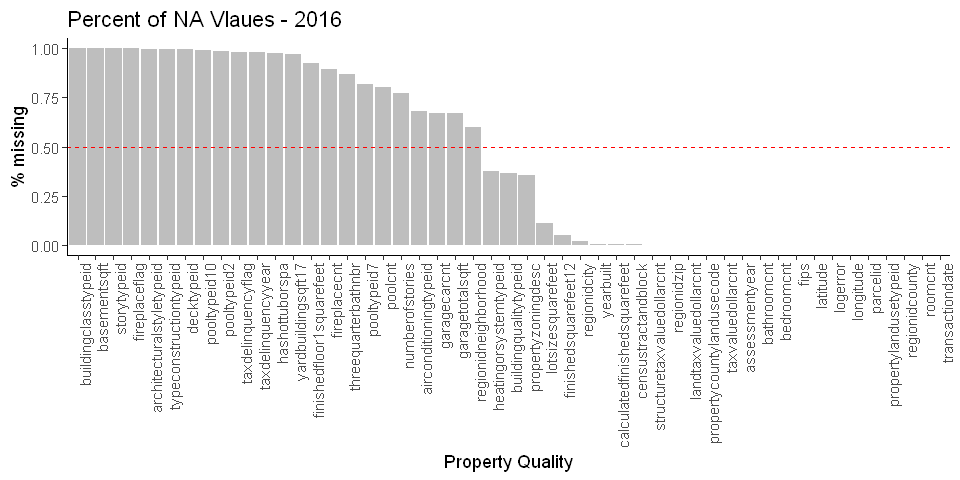

In [10]:
options(repr.plot.width=8, repr.plot.height=4)
NA.aggregated <- properties2016.merged %>% summarize_all(funs(sum(is.na(.))/n()))
NA.aggregated <- gather(NA.aggregated, key="quality", value="precent.NA")
NA.aggregated %>% 
  ggplot(aes(x=reorder(quality,-precent.NA),y=precent.NA)) +
  geom_bar(stat="identity", fill="gray")+
  geom_hline(yintercept=0.5, linetype="dashed", color = "red")+
  labs(title="Percent of NA Vlaues - 2016", x="Property Quality", y="% missing")+
  theme(panel.grid.major = element_blank(),     #removes grid & bg
                  panel.grid.minor = element_blank(), 
                  panel.background = element_blank(), 
                  axis.line = element_line(colour = "black")) +
  theme(axis.text.x=element_text(angle=90, hjust=1))

In [11]:
#make a list of columns that have more than 50% 'NA' values

col_no <- {}
per <- {}

for (i in 1:ncol(properties2016.merged)) {
  x <- sum(is.na(properties2016.merged[i]))/length(properties2016.merged$parcelid)*100
  col_no <- c(col_no, i)
  per <- c(per, x)
}

output <- data.frame(column_no=col_no, percent_na=per)
exclude <- output[output$percent_na > 50,]
t(round(exclude,1))

,4,5,6,9,11,12,16,17,18,19,...,27,33,36,37,38,39,41,42,47,48
column_no,4.0,5.0,6,9,11.0,12.0,16.0,17.0,18.0,19.0,...,27.0,33.0,36,37.0,38.0,39.0,41.0,42.0,47,48
percent_na,68.1,99.7,100,100,99.3,92.4,89.4,66.8,66.8,97.4,...,81.5,60.1,100,86.7,99.7,97.1,77.2,99.8,98,98


In [12]:
#report number of features to exclude
length(t(round(exclude[1],1)))

[1] 23

In [13]:
#drop columns that are in exclude list 
properties2016.trimmed <- properties2016.merged[,-(as.numeric(t(round(exclude[1],1))))]
head(properties2016.trimmed)

parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,heatingorsystemtypeid,...,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock
10711738,0.0276,2016-08-02,3,4,4,2538,2538,6037,2,...,12447,3101,96339,0,1978,245180,567112,2015,321932,6.037113e+13
10711755,-0.0182,2016-08-02,3,3,4,1589,1589,6037,2,...,12447,3101,96339,0,1959,254691,459844,2015,205153,6.037113e+13
10711805,-0.1009,2016-05-03,2,3,4,2411,2411,6037,2,...,12447,3101,96339,0,1973,235114,384787,2015,149673,6.037113e+13
10711816,-0.0121,2016-04-05,2,4,4,2232,2232,6037,2,...,12447,3101,96339,0,1973,262309,437176,2015,174867,6.037113e+13
10711858,-0.0481,2016-07-15,2,4,4,1882,1882,6037,2,...,12447,3101,96339,0,1973,232037,382055,2015,150018,6.037113e+13
10711910,0.2897,2016-08-30,2,3,4,1477,1477,6037,2,...,12447,3101,96339,0,1960,57098,76860,2015,19762,6.037113e+13


In [14]:
#report number of rows and features
dim(properties2016.trimmed)

[1] 90275    26

26 columns left: 49 columns from original data minus 23 excluded values  
rows still match number of rows from `train.2016` table

### Detection & Removal of Outliers

histogram of logerror values reveal most values fall in a tight range. using boxplot to identify the outliers and sort function to select out values below -0.1555 and above 0.1689.

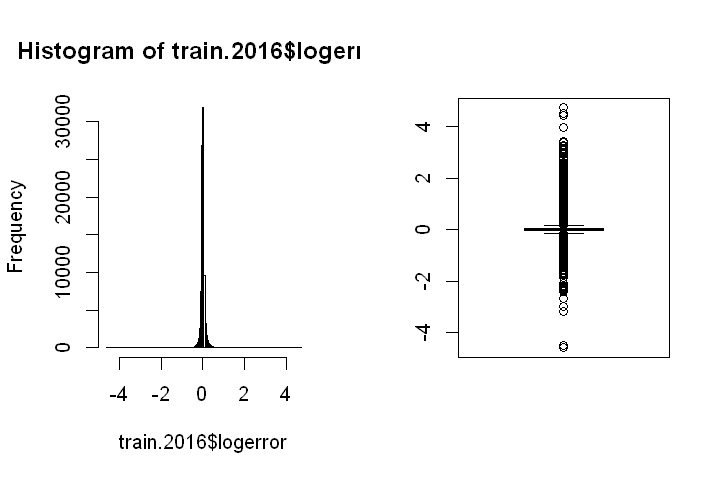

In [15]:
#distribution of logerror values
layout(matrix(1:2, nrow = 1))
options(repr.plot.width=6, repr.plot.height=4)
hist(train.2016$logerror, breaks=200)
le<-boxplot(properties2016.trimmed$logerror, data=properties2016.trimmed, range=2)

In [16]:
sort(le$out)

[1] -4.6050 -4.6050 -4.5100 -3.1940 -2.9760 -2.6880 -2.3970 -2.3750 -2.3650
  [10] -2.3650 -2.3540 -2.3540 -2.3540 -2.3330 -2.3330 -2.3230 -2.3230 -2.3230
  [19] -2.3130 -2.3130 -2.3130 -2.3130 -2.3130 -2.3130 -2.3130 -2.3030 -2.3030
  [28] -2.2930 -2.2930 -2.2930 -2.2930 -2.2830 -2.2830 -2.2730 -2.2730 -2.2730
  [37] -2.2730 -2.2730 -2.2630 -2.2540 -2.2540 -2.2440 -2.2350 -2.2260 -2.2070
  [46] -2.1890 -2.0870 -1.8580 -1.7840 -1.7370 -1.7090 -1.7090 -1.6820 -1.6770
  [55] -1.6050 -1.5750 -1.5650 -1.5370 -1.5320 -1.4870 -1.4570 -1.4350 -1.4110
  [64] -1.4070 -1.3900 -1.3900 -1.3900 -1.3780 -1.3740 -1.3590 -1.3360 -1.3240
  [73] -1.2980 -1.2730 -1.2730 -1.2590 -1.2590 -1.2520 -1.2380 -1.2310 -1.2310
  [82] -1.2070 -1.2070 -1.2040 -1.1910 -1.1740 -1.1710 -1.1710 -1.1620 -1.1620
  [91] -1.1580 -1.1580 -1.1550 -1.1390 -1.1330 -1.1240 -1.1150 -1.1000 -1.0940
 [100] -1.0820 -1.0790 -1.0790 -1.0760 -1.0730 -1.0560 -1.0500 -1.0500 -1.0500
 [109] -1.0470 -1.0380 -1.0380 -1.0270 -1.0190 -1.0130 -1.0080 -1.0050 -0.9997
 [118] -0.9970 -0.9943 -0.9889 -0.9862 -0.9782 -0.9755 -0.9729 -0.9702 -0.9597
 [127] -0.9545 -0.9519 -0.9467 -0.9467 -0.9390 -0.9390 -0.9365 -0.9339 -0.9339
 [136] -0.9339 -0.9289 -0.9289 -0.9263 -0.9188 -0.9113 -0.9113 -0.9113 -0.9063
 [145] -0.9063 -0.9039 -0.9014 -0.8989 -0.8940 -0.8916 -0.8892 -0.8892 -0.8867
 [154] -0.8819 -0.8819 -0.8795 -0.8795 -0.8723 -0.8723 -0.8723 -0.8723 -0.8723
 [163] -0.8699 -0.8675 -0.8675 -0.8651 -0.8651 -0.8651 -0.8651 -0.8627 -0.8604
 [172] -0.8604 -0.8604 -0.8580 -0.8557 -0.8533 -0.8486 -0.8486 -0.8486 -0.8463
 [181] -0.8440 -0.8393 -0.8393 -0.8370 -0.8370 -0.8370 -0.8347 -0.8324 -0.8324
 [190] -0.8301 -0.8187 -0.8164 -0.8097 -0.8074 -0.8074 -0.8052 -0.8052 -0.8052
 [199] -0.7941 -0.7941 -0.7941 -0.7897 -0.7875 -0.7831 -0.7787 -0.7787 -0.7787
 [208] -0.7765 -0.7765 -0.7744 -0.7744 -0.7700 -0.7700 -0.7700 -0.7679 -0.7679
 [217] -0.7679 -0.7657 -0.7614 -0.7572 -0.7550 -0.7508 -0.7508 -0.7508 -0.7487
 [226] -0.7465 -0.7465 -0.7402 -0.7381 -0.7361 -0.7361 -0.7340 -0.7319 -0.7319
 [235] -0.7319 -0.7298 -0.7277 -0.7277 -0.7236 -0.7215 -0.7215 -0.7215 -0.7215
 [244] -0.7174 -0.7154 -0.7154 -0.7154 -0.7154 -0.7133 -0.7133 -0.7133 -0.7133
 [253] -0.7133 -0.7093 -0.7072 -0.7052 -0.7052 -0.7052 -0.7052 -0.7032 -0.7032
 [262] -0.7032 -0.7012 -0.6992 -0.6972 -0.6972 -0.6972 -0.6951 -0.6931 -0.6911
 [271] -0.6911 -0.6892 -0.6872 -0.6872 -0.6852 -0.6852 -0.6832 -0.6812 -0.6792
 [280] -0.6753 -0.6733 -0.6714 -0.6714 -0.6714 -0.6694 -0.6675 -0.6675 -0.6655
 [289] -0.6655 -0.6636 -0.6616 -0.6616 -0.6597 -0.6597 -0.6578 -0.6578 -0.6578
 [298] -0.6578 -0.6559 -0.6539 -0.6539 -0.6539 -0.6539 -0.6520 -0.6520 -0.6501
 [307] -0.6482 -0.6482 -0.6463 -0.6463 -0.6444 -0.6406 -0.6406 -0.6406 -0.6387
 [316] -0.6387 -0.6387 -0.6368 -0.6368 -0.6368 -0.6368 -0.6368 -0.6349 -0.6349
 [325] -0.6349 -0.6330 -0.6330 -0.6330 -0.6330 -0.6311 -0.6292 -0.6255 -0.6255
 [334] -0.6236 -0.6236 -0.6218 -0.6199 -0.6180 -0.6162 -0.6143 -0.6143 -0.6106
 [343] -0.6070 -0.6051 -0.6033 -0.6033 -0.6033 -0.6015 -0.5997 -0.5997 -0.5997
 [352] -0.5997 -0.5997 -0.5960 -0.5960 -0.5960 -0.5960 -0.5942 -0.5870 -0.5852
 [361] -0.5852 -0.5852 -0.5816 -0.5816 -0.5816 -0.5816 -0.5798 -0.5798 -0.5780
 [370] -0.5780 -0.5727 -0.5727 -0.5709 -0.5709 -0.5656 -0.5656 -0.5639 -0.5639
 [379] -0.5621 -0.5586 -0.5586 -0.5586 -0.5586 -0.5569 -0.5551 -0.5551 -0.5534
 [388] -0.5534 -0.5534 -0.5516 -0.5516 -0.5499 -0.5499 -0.5499 -0.5482 -0.5465
 [397] -0.5465 -0.5465 -0.5447 -0.5447 -0.5430 -0.5430 -0.5430 -0.5430 -0.5396
 [406] -0.5396 -0.5396 -0.5379 -0.5379 -0.5310 -0.5310 -0.5293 -0.5293 -0.5293
 [415] -0.5259 -0.5259 -0.5259 -0.5242 -0.5242 -0.5226 -0.5226 -0.5226 -0.5209
 [424] -0.5209 -0.5209 -0.5209 -0.5192 -0.5192 -0.5192 -0.5192 -0.5175 -0.5175
 [433] -0.5158 -0.5158 -0.5158 -0.5158 -0.5158 -0.5142 -0.5142 -0.5142 -0.5125
 [442] -0.5125 -0.5108 -0.5108 -0.5108 -0.5092 -0.5075 -0.5075 -0.5075 -0.5058
 [451] -0.5042 -0.5042 -0.5042 -0.5042 -0.5025 -0.502

anything greater than 5 bathrooms is considered an outlier

[1]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
  [15]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
  [29]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
  [43]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
  [57]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
  [71]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
  [85]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
  [99]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [113]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [127]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [141]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [155]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [169]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [183]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [197]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [211]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [225]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [239]  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5  5.5
 [253]  5.5  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [267]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [281]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [295]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [309]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [323]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [337]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [351]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [365]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [379]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [393]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [407]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [421]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [435]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [449]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [463]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [477]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [491]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [505]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [519]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [533]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [547]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [561]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [575]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [589]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [603]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [617]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [631]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [645]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [659]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [673]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [687]  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0
 [701]  6.0  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5
 [715]  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5  6.5

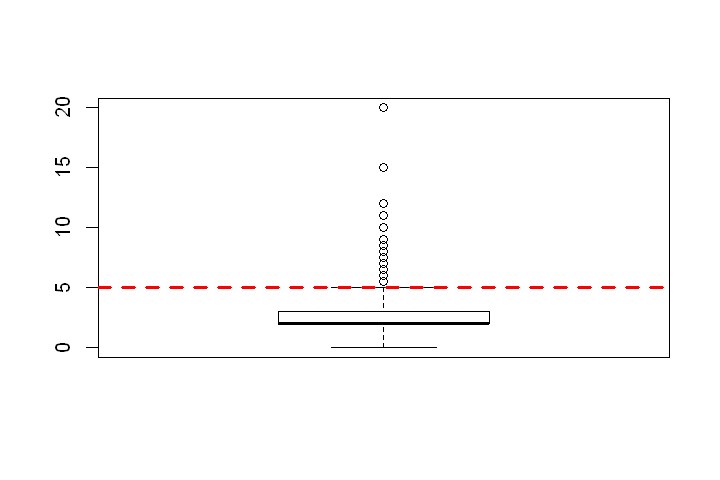

In [17]:
br<-boxplot(properties2016.trimmed$bathroomcnt, data=properties2016.trimmed, range=2)
abline(h=5, col="red", lwd=3, lty=2)
sort(br$out)

anything greater than 8 bedrooms is considered an outlier

[1]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
 [26]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
 [51]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
 [76]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10
[101] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
[126] 10 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12
[151] 12 12 12 12 12 12 12 12 12 12 13 14 14 14 15 16 16 16 16

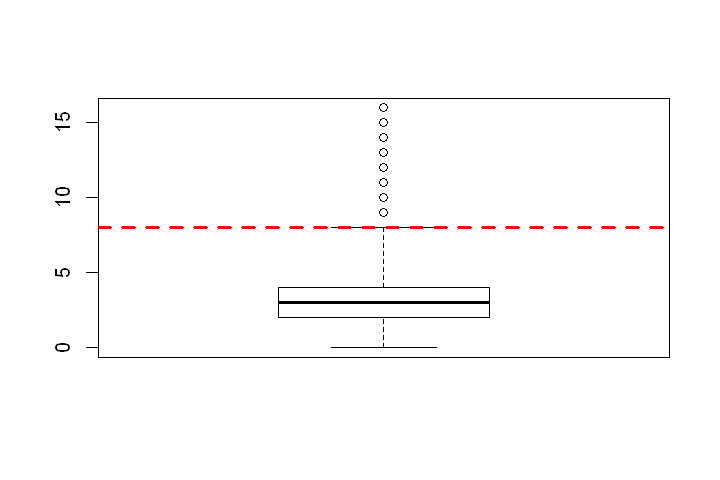

In [18]:
b<-boxplot(properties2016.trimmed$bedroomcnt, data=properties2016.trimmed, range=2)
abline(h=min(b$out-1), col="red", lwd=3, lty=2)
sort(b$out)

no rows will be removed based on buildingqualitytypeid (condition of the property)

numeric(0)

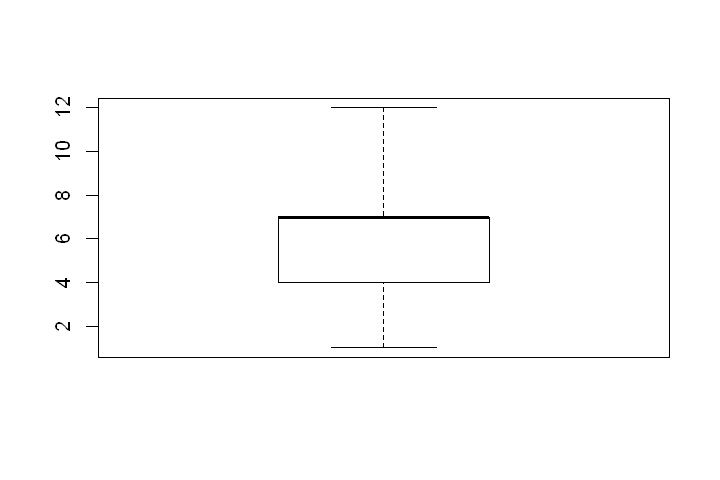

In [19]:
b<-boxplot(properties2016.trimmed$buildingqualitytypeid, data=properties2016.trimmed, range=2)
sort(b$out)

anything home greater than 4000 sq feet is considered an outlier

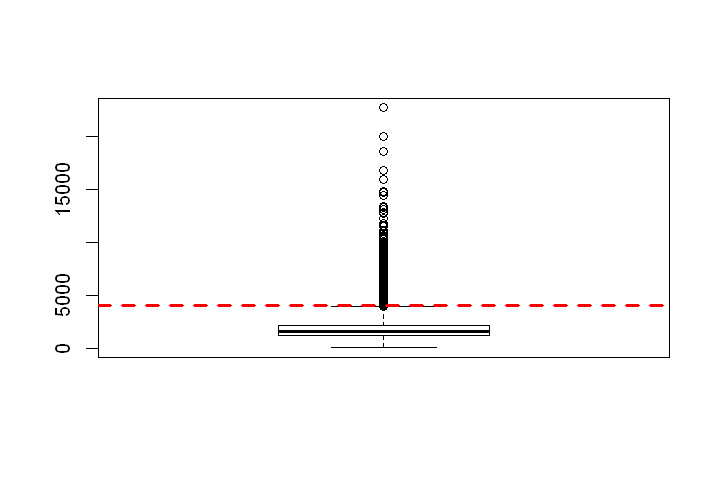

In [20]:
b<-boxplot(properties2016.trimmed$calculatedfinishedsquarefeet, data=properties2016.trimmed, range=2)
abline(h=4000, col="red", lwd=3, lty=2)

no rows will be removed based on the year the property was built

[1] 1885 1885 1885 1885 1885 1885 1886 1887 1888 1888 1890 1890 1890 1890 1890
 [16] 1890 1890 1890 1890 1890 1890 1890 1890 1890 1890 1890 1890 1890 1891 1892
 [31] 1892 1892 1893 1893 1893 1894 1894 1894 1894 1894 1895 1895 1895 1895 1895
 [46] 1895 1895 1895 1895 1895 1895 1895 1895 1895 1895 1895 1896 1896 1896 1896
 [61] 1896 1897 1897 1897 1898 1898 1898 1898 1898 1898 1898 1898 1898 1898 1899
 [76] 1899 1899 1899 1899 1899 1900 1900 1900 1900 1900 1900 1900 1900 1900 1900
 [91] 1900 1900 1900 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901
[106] 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901
[121] 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901 1901

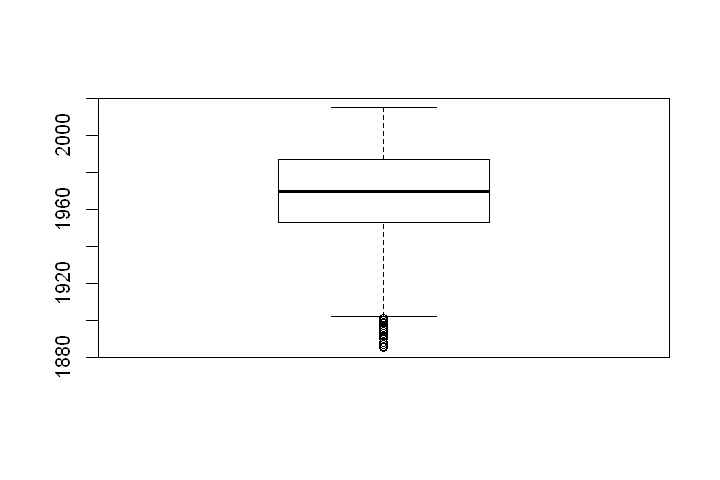

In [21]:
b<-boxplot(properties2016.trimmed$yearbuilt, data=properties2016.trimmed, range=1.5)
sort(b$out)

since many of these features are related, we will focus on removing rows with extreme values.

In [22]:
newdata <- properties2016.trimmed[properties2016.trimmed$logerror >= -0.1555 & 
                                  properties2016.trimmed$logerror <= 0.1689 &
                                  properties2016.trimmed$bathroomcnt <= 5 &
                                  properties2016.trimmed$bedroomcnt <= 8 &
                                  properties2016.trimmed$calculatedfinishedsquarefeet <= 4000,]
dim(newdata)

[1] 80204    26

outlier data accounts for more than 10,000 rows  
80,204 rows remain  
26 features match the number of features before outlier removal

### Output File

In [23]:
#output to csv file
write.csv(newdata, file = "outlierRemoval2016.csv")